In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');
from datetime import datetime


## Importing Dataset named 'YourCabs.csv'

In [2]:
Cab_data = pd.read_csv('YourCabs.csv')

In [3]:
Cab_data

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [4]:
Cab_data.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [5]:
Cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

## Droping the Columns 'id' & 'user_id' from the dataframe :
- 'id' because it have unique values
- 'user_id' because due to PII(Personal Information identifier)


In [6]:
Columns_to_drop = ['id','user_id']

In [7]:
Cab_data = Cab_data.drop(columns=Columns_to_drop)

In [8]:
Cab_data

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


# Droping the Columns 'vehicle_model_id' & 'package_id' from the dataframe  as:
- 'vehicle_model_id' because it have categorical - discrete data for 'vehicle_model_id' column and to be removed because of  73.36% data for vehicle_model_id=12 & will create bias in our model.
- 'package_id' is also to be removed.


In [9]:
columns_to_drop = ['vehicle_model_id', 'package_id']


In [10]:
Cab_data = Cab_data.drop(columns = columns_to_drop  )

In [11]:
Cab_data

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


# Replacing the NAN values(Missing values to 0)

In [12]:
Cab_data = Cab_data.fillna(0)


In [13]:
Cab_data

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,2,83.0,448.0,0.0,0.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,2,1010.0,540.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,2,1301.0,1034.0,0.0,0.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,2,768.0,398.0,0.0,0.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,2,1365.0,849.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1147.0,452.0,15.0,0.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,2,393.0,466.0,15.0,0.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,3,974.0,0.0,15.0,0.0,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,0.000000,0.000000,0
43429,2,1263.0,542.0,15.0,0.0,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


# Applying Haversine Distance formula to calculate the distance between 'from- location' to 'to_location' using the coordinates of latitudes and longitudes

In [14]:
def haversine_distance(lat1, lon1, lat2, lon2):
   
    r = 6371.0 

   
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)


    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = r * c

    return distance

In [15]:
Cab_data['distance'] = Cab_data.apply(lambda x: haversine_distance(x['from_lat'], x['from_long'], 
                                                        x['to_lat'], x['to_long']), axis=1)

In [16]:
Cab_data

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,distance
0,2,83.0,448.0,0.0,0.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,3.975764
1,2,1010.0,540.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,13.995033
2,2,1301.0,1034.0,0.0,0.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,12.708414
3,2,768.0,398.0,0.0,0.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,9.525153
4,2,1365.0,849.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,14.699782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1147.0,452.0,15.0,0.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,10.711968
43427,2,393.0,466.0,15.0,0.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,21.345603
43428,3,974.0,0.0,15.0,0.0,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,0.000000,0.000000,0,8660.590867
43429,2,1263.0,542.0,15.0,0.0,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0,4.594393


In [17]:
Cab_data = Cab_data.drop(['from_lat', 'from_long', 'to_lat', 'to_long'], axis=1)

In [18]:
Cab_data

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,distance
0,2,83.0,448.0,0.0,0.0,01-01-2013 02:00,0,0,01-01-2013 01:39,0,3.975764
1,2,1010.0,540.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 02:25,0,13.995033
2,2,1301.0,1034.0,0.0,0.0,01-01-2013 03:30,0,0,01-01-2013 03:08,0,12.708414
3,2,768.0,398.0,0.0,0.0,01-01-2013 05:45,0,0,01-01-2013 04:39,0,9.525153
4,2,1365.0,849.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 07:53,0,14.699782
...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1147.0,452.0,15.0,0.0,11/24/2013 18:00,1,0,11/24/2013 14:25,0,10.711968
43427,2,393.0,466.0,15.0,0.0,11/26/2013 1:00,1,0,11/24/2013 14:30,0,21.345603
43428,3,974.0,0.0,15.0,0.0,11/24/2013 18:30,0,0,11/24/2013 14:35,0,8660.590867
43429,2,1263.0,542.0,15.0,0.0,11/24/2013 16:00,0,0,11/24/2013 14:43,0,4.594393


In [19]:
column_c = Cab_data.pop('distance')


Cab_data.insert(9, 'distance', column_c)


In [20]:
Cab_data

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
0,2,83.0,448.0,0.0,0.0,01-01-2013 02:00,0,0,01-01-2013 01:39,3.975764,0
1,2,1010.0,540.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 02:25,13.995033,0
2,2,1301.0,1034.0,0.0,0.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.708414,0
3,2,768.0,398.0,0.0,0.0,01-01-2013 05:45,0,0,01-01-2013 04:39,9.525153,0
4,2,1365.0,849.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 07:53,14.699782,0
...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1147.0,452.0,15.0,0.0,11/24/2013 18:00,1,0,11/24/2013 14:25,10.711968,0
43427,2,393.0,466.0,15.0,0.0,11/26/2013 1:00,1,0,11/24/2013 14:30,21.345603,0
43428,3,974.0,0.0,15.0,0.0,11/24/2013 18:30,0,0,11/24/2013 14:35,8660.590867,0
43429,2,1263.0,542.0,15.0,0.0,11/24/2013 16:00,0,0,11/24/2013 14:43,4.594393,0


# Splitting the above DataFrame into 3 DataFrames on the basis of travel_type_id(Travel type)

In [21]:
Cab_data_1 = Cab_data[Cab_data['travel_type_id'] == 1]

In [22]:
Cab_data_1

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
6,1,571.0,0.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,8674.777636,0
17,1,1383.0,0.0,0.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,8673.514358,0
24,1,515.0,0.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,8672.439060,0
158,1,136.0,0.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,8666.719345,0
216,1,1118.0,0.0,0.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,8659.935721,0
...,...,...,...,...,...,...,...,...,...,...,...
43342,1,393.0,0.0,15.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,8677.266054,0
43385,1,119.0,0.0,15.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,8663.984530,0
43386,1,1281.0,0.0,15.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,8665.468691,0
43393,1,393.0,0.0,15.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,8677.266054,0


In [23]:
Cab_data_2 = Cab_data[Cab_data['travel_type_id'] == 2]

In [24]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
0,2,83.0,448.0,0.0,0.0,01-01-2013 02:00,0,0,01-01-2013 01:39,3.975764,0
1,2,1010.0,540.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 02:25,13.995033,0
2,2,1301.0,1034.0,0.0,0.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.708414,0
3,2,768.0,398.0,0.0,0.0,01-01-2013 05:45,0,0,01-01-2013 04:39,9.525153,0
4,2,1365.0,849.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 07:53,14.699782,0
...,...,...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,15.0,0.0,11/25/2013 0:00,0,1,11/24/2013 14:24,12.174196,0
43426,2,1147.0,452.0,15.0,0.0,11/24/2013 18:00,1,0,11/24/2013 14:25,10.711968,0
43427,2,393.0,466.0,15.0,0.0,11/26/2013 1:00,1,0,11/24/2013 14:30,21.345603,0
43429,2,1263.0,542.0,15.0,0.0,11/24/2013 16:00,0,0,11/24/2013 14:43,4.594393,0


In [25]:
Cab_data_3 = Cab_data[Cab_data['travel_type_id'] == 3]

In [26]:
Cab_data_3

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
8,3,448.0,0.0,0.0,0.0,01-01-2013 16:00,0,0,01-01-2013 09:44,8668.077225,0
20,3,471.0,0.0,0.0,0.0,01-01-2013 14:30,0,0,01-01-2013 12:52,8668.520590,0
23,3,1286.0,0.0,0.0,0.0,01-01-2013 16:30,0,0,01-01-2013 14:39,8666.658983,0
34,3,1323.0,0.0,0.0,0.0,01-01-2013 20:00,1,0,01-01-2013 17:25,8669.655202,0
47,3,142.0,0.0,0.0,0.0,01-02-2013 03:00,0,0,01-01-2013 19:37,8665.127374,0
...,...,...,...,...,...,...,...,...,...,...,...
43415,3,768.0,0.0,15.0,0.0,11/24/2013 16:00,0,1,11/24/2013 12:32,8659.499027,0
43417,3,1390.0,0.0,15.0,0.0,11/24/2013 15:00,0,0,11/24/2013 13:06,8668.907484,0
43420,3,1237.0,0.0,15.0,0.0,11/25/2013 1:00,1,0,11/24/2013 13:54,8665.508122,0
43424,3,515.0,0.0,15.0,0.0,11/24/2013 15:15,0,0,11/24/2013 14:23,8672.439060,0


# Working for 'Cab_Data_1' Dataset

## Removing Columns 'to_area_id' &	'from_city_id' from 'Cab_Data_1' dataset 

In [27]:
Cab_data_1

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
6,1,571.0,0.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,8674.777636,0
17,1,1383.0,0.0,0.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,8673.514358,0
24,1,515.0,0.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,8672.439060,0
158,1,136.0,0.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,8666.719345,0
216,1,1118.0,0.0,0.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,8659.935721,0
...,...,...,...,...,...,...,...,...,...,...,...
43342,1,393.0,0.0,15.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,8677.266054,0
43385,1,119.0,0.0,15.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,8663.984530,0
43386,1,1281.0,0.0,15.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,8665.468691,0
43393,1,393.0,0.0,15.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,8677.266054,0


In [28]:
Cab_data_1 = Cab_data_1.drop(columns = ['to_area_id','from_city_id'])

In [29]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
6,1,571.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,8674.777636,0
17,1,1383.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,8673.514358,0
24,1,515.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,8672.439060,0
158,1,136.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,8666.719345,0
216,1,1118.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,8659.935721,0
...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,8677.266054,0
43385,1,119.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,8663.984530,0
43386,1,1281.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,8665.468691,0
43393,1,393.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,8677.266054,0


In [30]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
6,1,571.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,8674.777636,0
17,1,1383.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,8673.514358,0
24,1,515.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,8672.439060,0
158,1,136.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,8666.719345,0
216,1,1118.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,8659.935721,0
...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,8677.266054,0
43385,1,119.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,8663.984530,0
43386,1,1281.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,8665.468691,0
43393,1,393.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,8677.266054,0


In [31]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
6,1,571.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,8674.777636,0
17,1,1383.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,8673.514358,0
24,1,515.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,8672.439060,0
158,1,136.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,8666.719345,0
216,1,1118.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,8659.935721,0
...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,8677.266054,0
43385,1,119.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,8663.984530,0
43386,1,1281.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,8665.468691,0
43393,1,393.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,8677.266054,0


##  Making the date-time format as '%m-%d-%Y %H:%M'

In [32]:
Cab_data_1['from_date'] = pd.to_datetime(Cab_data_1['from_date'], 
                                       format='%m/%d/%Y %H:%M', 
                                       errors='coerce').combine_first(
                                           pd.to_datetime(Cab_data_1['from_date'], 
                                                          format='%m-%d-%Y %H:%M', 
                                                          errors='coerce'))

In [33]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
6,1,571.0,108.0,2013-01-01 09:45:00,0,0,01-01-2013 09:21,8674.777636,0
17,1,1383.0,32.0,2013-01-12 08:00:00,1,0,01-01-2013 12:17,8673.514358,0
24,1,515.0,32.0,2013-01-05 08:30:00,0,0,01-01-2013 14:40,8672.439060,0
158,1,136.0,152.0,2013-01-04 09:30:00,1,0,01-03-2013 12:19,8666.719345,0
216,1,1118.0,32.0,2013-01-06 07:30:00,1,0,01-04-2013 09:32,8659.935721,0
...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,2013-11-23 22:00:00,1,0,11/23/2013 17:54,8677.266054,0
43385,1,119.0,146.0,2013-11-29 14:00:00,1,0,11/23/2013 23:24,8663.984530,0
43386,1,1281.0,32.0,2013-11-24 07:30:00,1,0,11/23/2013 23:44,8665.468691,0
43393,1,393.0,116.0,2013-11-24 10:30:00,0,0,11/24/2013 7:14,8677.266054,0


##  Making the date-time format as '%m-%d-%Y %H:%M' in the column 'booking_created'


In [34]:
Cab_data_1['booking_created'] = pd.to_datetime(Cab_data_1['booking_created'], 
                                       format='%m/%d/%Y %H:%M', 
                                       errors='coerce').combine_first(
                                           pd.to_datetime(Cab_data_1['booking_created'], 
                                                          format='%m-%d-%Y %H:%M', 
                                                          errors='coerce'))

In [35]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
6,1,571.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,8674.777636,0
17,1,1383.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,8673.514358,0
24,1,515.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,8672.439060,0
158,1,136.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,8666.719345,0
216,1,1118.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,8659.935721,0
...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,2013-11-23 22:00:00,1,0,2013-11-23 17:54:00,8677.266054,0
43385,1,119.0,146.0,2013-11-29 14:00:00,1,0,2013-11-23 23:24:00,8663.984530,0
43386,1,1281.0,32.0,2013-11-24 07:30:00,1,0,2013-11-23 23:44:00,8665.468691,0
43393,1,393.0,116.0,2013-11-24 10:30:00,0,0,2013-11-24 07:14:00,8677.266054,0


In [36]:
Cab_data_1


,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
6,1,571.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,8674.777636,0
17,1,1383.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,8673.514358,0
24,1,515.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,8672.439060,0
158,1,136.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,8666.719345,0
216,1,1118.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,8659.935721,0
...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,2013-11-23 22:00:00,1,0,2013-11-23 17:54:00,8677.266054,0
43385,1,119.0,146.0,2013-11-29 14:00:00,1,0,2013-11-23 23:24:00,8663.984530,0
43386,1,1281.0,32.0,2013-11-24 07:30:00,1,0,2013-11-23 23:44:00,8665.468691,0
43393,1,393.0,116.0,2013-11-24 10:30:00,0,0,2013-11-24 07:14:00,8677.266054,0


## Applying "unix timestamp" feature to convert the date-time format in float variable

In [37]:
Cab_data_1['from_date(unix_timestamp)'] = Cab_data_1['from_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [38]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation,from_date(unix_timestamp)
6,1,571.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,8674.777636,0,1.357034e+09
17,1,1383.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,8673.514358,0,1.357978e+09
24,1,515.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,8672.439060,0,1.357375e+09
158,1,136.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,8666.719345,0,1.357292e+09
216,1,1118.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,8659.935721,0,1.357457e+09
...,...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,2013-11-23 22:00:00,1,0,2013-11-23 17:54:00,8677.266054,0,1.385244e+09
43385,1,119.0,146.0,2013-11-29 14:00:00,1,0,2013-11-23 23:24:00,8663.984530,0,1.385734e+09
43386,1,1281.0,32.0,2013-11-24 07:30:00,1,0,2013-11-23 23:44:00,8665.468691,0,1.385278e+09
43393,1,393.0,116.0,2013-11-24 10:30:00,0,0,2013-11-24 07:14:00,8677.266054,0,1.385289e+09


In [39]:
Cab_data_1['booking_created(unix_timestamp)'] = Cab_data_1['from_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [40]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation,from_date(unix_timestamp),booking_created(unix_timestamp)
6,1,571.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,8674.777636,0,1.357034e+09,1.357034e+09
17,1,1383.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,8673.514358,0,1.357978e+09,1.357978e+09
24,1,515.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,8672.439060,0,1.357375e+09,1.357375e+09
158,1,136.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,8666.719345,0,1.357292e+09,1.357292e+09
216,1,1118.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,8659.935721,0,1.357457e+09,1.357457e+09
...,...,...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,2013-11-23 22:00:00,1,0,2013-11-23 17:54:00,8677.266054,0,1.385244e+09,1.385244e+09
43385,1,119.0,146.0,2013-11-29 14:00:00,1,0,2013-11-23 23:24:00,8663.984530,0,1.385734e+09,1.385734e+09
43386,1,1281.0,32.0,2013-11-24 07:30:00,1,0,2013-11-23 23:44:00,8665.468691,0,1.385278e+09,1.385278e+09
43393,1,393.0,116.0,2013-11-24 10:30:00,0,0,2013-11-24 07:14:00,8677.266054,0,1.385289e+09,1.385289e+09


In [41]:
Cab_data_1['from_date(unix_timestamp)'] = Cab_data_1['from_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [42]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation,from_date(unix_timestamp),booking_created(unix_timestamp)
6,1,571.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,8674.777636,0,1.357034e+09,1.357034e+09
17,1,1383.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,8673.514358,0,1.357978e+09,1.357978e+09
24,1,515.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,8672.439060,0,1.357375e+09,1.357375e+09
158,1,136.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,8666.719345,0,1.357292e+09,1.357292e+09
216,1,1118.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,8659.935721,0,1.357457e+09,1.357457e+09
...,...,...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,2013-11-23 22:00:00,1,0,2013-11-23 17:54:00,8677.266054,0,1.385244e+09,1.385244e+09
43385,1,119.0,146.0,2013-11-29 14:00:00,1,0,2013-11-23 23:24:00,8663.984530,0,1.385734e+09,1.385734e+09
43386,1,1281.0,32.0,2013-11-24 07:30:00,1,0,2013-11-23 23:44:00,8665.468691,0,1.385278e+09,1.385278e+09
43393,1,393.0,116.0,2013-11-24 10:30:00,0,0,2013-11-24 07:14:00,8677.266054,0,1.385289e+09,1.385289e+09


In [43]:
columns_to_drop = ['from_date','booking_created']
Cab_data_1.drop(columns = columns_to_drop, axis =1 )

,travel_type_id,from_area_id,to_city_id,online_booking,mobile_site_booking,distance,Car_Cancellation,from_date(unix_timestamp),booking_created(unix_timestamp)
6,1,571.0,108.0,0,0,8674.777636,0,1.357034e+09,1.357034e+09
17,1,1383.0,32.0,1,0,8673.514358,0,1.357978e+09,1.357978e+09
24,1,515.0,32.0,0,0,8672.439060,0,1.357375e+09,1.357375e+09
158,1,136.0,152.0,1,0,8666.719345,0,1.357292e+09,1.357292e+09
216,1,1118.0,32.0,1,0,8659.935721,0,1.357457e+09,1.357457e+09
...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,1,0,8677.266054,0,1.385244e+09,1.385244e+09
43385,1,119.0,146.0,1,0,8663.984530,0,1.385734e+09,1.385734e+09
43386,1,1281.0,32.0,1,0,8665.468691,0,1.385278e+09,1.385278e+09
43393,1,393.0,116.0,0,0,8677.266054,0,1.385289e+09,1.385289e+09


In [44]:
column_c = Cab_data_1.pop('booking_created(unix_timestamp)')


Cab_data_1.insert(6, 'booking_created(unix_timestamp)', column_c)


In [45]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created(unix_timestamp),booking_created,distance,Car_Cancellation,from_date(unix_timestamp)
6,1,571.0,108.0,2013-01-01 09:45:00,0,0,1.357034e+09,2013-01-01 09:21:00,8674.777636,0,1.357034e+09
17,1,1383.0,32.0,2013-01-12 08:00:00,1,0,1.357978e+09,2013-01-01 12:17:00,8673.514358,0,1.357978e+09
24,1,515.0,32.0,2013-01-05 08:30:00,0,0,1.357375e+09,2013-01-01 14:40:00,8672.439060,0,1.357375e+09
158,1,136.0,152.0,2013-01-04 09:30:00,1,0,1.357292e+09,2013-01-03 12:19:00,8666.719345,0,1.357292e+09
216,1,1118.0,32.0,2013-01-06 07:30:00,1,0,1.357457e+09,2013-01-04 09:32:00,8659.935721,0,1.357457e+09
...,...,...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,2013-11-23 22:00:00,1,0,1.385244e+09,2013-11-23 17:54:00,8677.266054,0,1.385244e+09
43385,1,119.0,146.0,2013-11-29 14:00:00,1,0,1.385734e+09,2013-11-23 23:24:00,8663.984530,0,1.385734e+09
43386,1,1281.0,32.0,2013-11-24 07:30:00,1,0,1.385278e+09,2013-11-23 23:44:00,8665.468691,0,1.385278e+09
43393,1,393.0,116.0,2013-11-24 10:30:00,0,0,1.385289e+09,2013-11-24 07:14:00,8677.266054,0,1.385289e+09


In [46]:
column_c = Cab_data_1.pop('from_date(unix_timestamp)')


Cab_data_1.insert(3, 'from_date(unix_timestamp)', column_c)

In [47]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date(unix_timestamp),from_date,online_booking,mobile_site_booking,booking_created(unix_timestamp),booking_created,distance,Car_Cancellation
6,1,571.0,108.0,1.357034e+09,2013-01-01 09:45:00,0,0,1.357034e+09,2013-01-01 09:21:00,8674.777636,0
17,1,1383.0,32.0,1.357978e+09,2013-01-12 08:00:00,1,0,1.357978e+09,2013-01-01 12:17:00,8673.514358,0
24,1,515.0,32.0,1.357375e+09,2013-01-05 08:30:00,0,0,1.357375e+09,2013-01-01 14:40:00,8672.439060,0
158,1,136.0,152.0,1.357292e+09,2013-01-04 09:30:00,1,0,1.357292e+09,2013-01-03 12:19:00,8666.719345,0
216,1,1118.0,32.0,1.357457e+09,2013-01-06 07:30:00,1,0,1.357457e+09,2013-01-04 09:32:00,8659.935721,0
...,...,...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,1.385244e+09,2013-11-23 22:00:00,1,0,1.385244e+09,2013-11-23 17:54:00,8677.266054,0
43385,1,119.0,146.0,1.385734e+09,2013-11-29 14:00:00,1,0,1.385734e+09,2013-11-23 23:24:00,8663.984530,0
43386,1,1281.0,32.0,1.385278e+09,2013-11-24 07:30:00,1,0,1.385278e+09,2013-11-23 23:44:00,8665.468691,0
43393,1,393.0,116.0,1.385289e+09,2013-11-24 10:30:00,0,0,1.385289e+09,2013-11-24 07:14:00,8677.266054,0


In [48]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date(unix_timestamp),from_date,online_booking,mobile_site_booking,booking_created(unix_timestamp),booking_created,distance,Car_Cancellation
6,1,571.0,108.0,1.357034e+09,2013-01-01 09:45:00,0,0,1.357034e+09,2013-01-01 09:21:00,8674.777636,0
17,1,1383.0,32.0,1.357978e+09,2013-01-12 08:00:00,1,0,1.357978e+09,2013-01-01 12:17:00,8673.514358,0
24,1,515.0,32.0,1.357375e+09,2013-01-05 08:30:00,0,0,1.357375e+09,2013-01-01 14:40:00,8672.439060,0
158,1,136.0,152.0,1.357292e+09,2013-01-04 09:30:00,1,0,1.357292e+09,2013-01-03 12:19:00,8666.719345,0
216,1,1118.0,32.0,1.357457e+09,2013-01-06 07:30:00,1,0,1.357457e+09,2013-01-04 09:32:00,8659.935721,0
...,...,...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,1.385244e+09,2013-11-23 22:00:00,1,0,1.385244e+09,2013-11-23 17:54:00,8677.266054,0
43385,1,119.0,146.0,1.385734e+09,2013-11-29 14:00:00,1,0,1.385734e+09,2013-11-23 23:24:00,8663.984530,0
43386,1,1281.0,32.0,1.385278e+09,2013-11-24 07:30:00,1,0,1.385278e+09,2013-11-23 23:44:00,8665.468691,0
43393,1,393.0,116.0,1.385289e+09,2013-11-24 10:30:00,0,0,1.385289e+09,2013-11-24 07:14:00,8677.266054,0


In [49]:
columns_to_drop = ['from_date', 'booking_created']
Cab_data_1 = Cab_data_1.drop(columns = columns_to_drop)

In [50]:
Cab_data_1

,travel_type_id,from_area_id,to_city_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance,Car_Cancellation
6,1,571.0,108.0,1.357034e+09,0,0,1.357034e+09,8674.777636,0
17,1,1383.0,32.0,1.357978e+09,1,0,1.357978e+09,8673.514358,0
24,1,515.0,32.0,1.357375e+09,0,0,1.357375e+09,8672.439060,0
158,1,136.0,152.0,1.357292e+09,1,0,1.357292e+09,8666.719345,0
216,1,1118.0,32.0,1.357457e+09,1,0,1.357457e+09,8659.935721,0
...,...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,1.385244e+09,1,0,1.385244e+09,8677.266054,0
43385,1,119.0,146.0,1.385734e+09,1,0,1.385734e+09,8663.984530,0
43386,1,1281.0,32.0,1.385278e+09,1,0,1.385278e+09,8665.468691,0
43393,1,393.0,116.0,1.385289e+09,0,0,1.385289e+09,8677.266054,0


## Splitting the features variables(X) and target variables(Y) 

In [51]:
X = Cab_data_1.iloc[:,0:8]

In [52]:
X

,travel_type_id,from_area_id,to_city_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance
6,1,571.0,108.0,1.357034e+09,0,0,1.357034e+09,8674.777636
17,1,1383.0,32.0,1.357978e+09,1,0,1.357978e+09,8673.514358
24,1,515.0,32.0,1.357375e+09,0,0,1.357375e+09,8672.439060
158,1,136.0,152.0,1.357292e+09,1,0,1.357292e+09,8666.719345
216,1,1118.0,32.0,1.357457e+09,1,0,1.357457e+09,8659.935721
...,...,...,...,...,...,...,...,...
43342,1,393.0,191.0,1.385244e+09,1,0,1.385244e+09,8677.266054
43385,1,119.0,146.0,1.385734e+09,1,0,1.385734e+09,8663.984530
43386,1,1281.0,32.0,1.385278e+09,1,0,1.385278e+09,8665.468691
43393,1,393.0,116.0,1.385289e+09,0,0,1.385289e+09,8677.266054


In [53]:
Y = Cab_data_1.iloc[:,8:9]

In [54]:
Y

,Car_Cancellation
6,0
17,0
24,0
158,0
216,0
...,...
43342,0
43385,0
43386,0
43393,0


## Splitting the data into training and testing data with the ratio of 80:20

In [55]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [56]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [57]:
Xtrain

array([[ 0.        , -0.51587411, -0.78725688, ..., -0.14732339,
         0.8641331 ,  0.26591091],
       [ 0.        , -0.51587411, -0.78725688, ..., -0.14732339,
        -0.17170928,  0.26591091],
       [ 0.        , -0.51587411, -1.14669057, ..., -0.14732339,
         1.44304203,  0.26591091],
       ...,
       [ 0.        , -0.81068069,  1.58899919, ..., -0.14732339,
         0.15707872,  0.26456694],
       [ 0.        , -0.0166049 , -0.26807488, ..., -0.14732339,
         1.41148028,  0.26042884],
       [ 0.        , -1.09359991, -0.72735126, ..., -0.14732339,
         0.71522334,  0.26024431]])

In [58]:
Xtest

array([[ 0.        , -1.12688452,  1.84859019, ..., -0.14732339,
         0.65850711,  0.26095938],
       [ 0.        , -0.0593994 ,  1.66887334, ..., -0.14732339,
        -0.78763801,  0.25852004],
       [ 0.        ,  1.87110822,  1.26950258, ...,  6.7877886 ,
         1.36461227, -3.80794245],
       ...,
       [ 0.        ,  1.01997309, -0.78725688, ..., -0.14732339,
        -0.56124772,  0.26209567],
       [ 0.        , -1.45022077, -0.24810634, ..., -0.14732339,
        -0.24159601, -3.80794245],
       [ 0.        ,  1.64287086, -0.78725688, ..., -0.14732339,
         1.09159127,  0.26117324]])

In [59]:
Ytrain

,Car_Cancellation
33356,0
19051,0
41574,0
13949,0
27517,0
...,...
32132,0
36693,0
23544,0
39621,0


In [60]:
Ytest

,Car_Cancellation
30407,0
11409,0
40927,0
8100,0
16883,0
...,...
28433,0
19044,0
13180,0
18373,0


## Applying Logistic Regression to classify on the basis of Predictive solution

In [61]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(Xtrain,Ytrain)

LogisticRegression(random_state=42)

In [62]:
Ypred=log_reg.predict(Xtest)
Ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
Ytest

,Car_Cancellation
30407,0
11409,0
40927,0
8100,0
16883,0
...,...
28433,0
19044,0
13180,0
18373,0


## Applying Logistic Regression to classify on the basis of Predictive Problem

In [64]:
Ypred=log_reg.predict(Xtest)
Ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Evaluate models using appropriate metrics such as accuracy, precision, recall and F1-score.

In [65]:

conf_matrix = confusion_matrix(Ytest,Ypred)
conf_matrix

array([[315,   0],
       [  3,   0]], dtype=int64)

<Axes: >

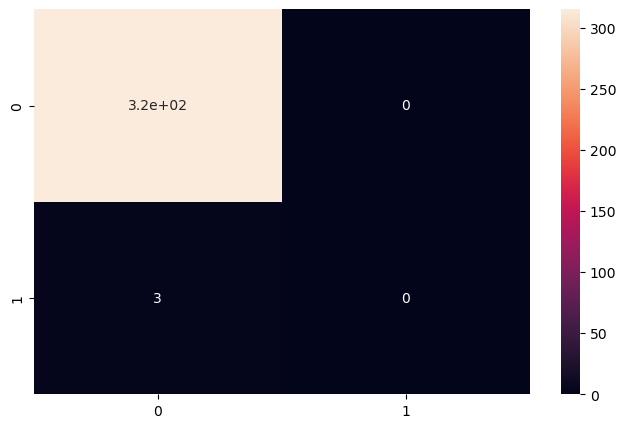

In [66]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)


In [67]:
accuracy = (315+0)/len(Ytest)
accuracy

0.9905660377358491

In [68]:
print("\nClassification Report:\n", classification_report(Ytest, Ypred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       315
           1       0.00      0.00      0.00         3

    accuracy                           0.99       318
   macro avg       0.50      0.50      0.50       318
weighted avg       0.98      0.99      0.99       318



## Using the predictive model to predict whether the new bookings be cancelled or not on the basis of this predictive model

In [69]:
New_booking = Xtest[0]
prediction = log_reg.predict([New_booking])

In [70]:
prediction

array([0], dtype=int64)

In [71]:
if prediction[0] == 1:
    print("Prediction: This booking is predicted to be cancelled due to car unavailability.")
else:
    print("Prediction: This booking is predicted not to be cancelled.")

Prediction: This booking is predicted not to be cancelled.


# Working for 'Cab_Data_2' Dataset


In [72]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
0,2,83.0,448.0,0.0,0.0,01-01-2013 02:00,0,0,01-01-2013 01:39,3.975764,0
1,2,1010.0,540.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 02:25,13.995033,0
2,2,1301.0,1034.0,0.0,0.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.708414,0
3,2,768.0,398.0,0.0,0.0,01-01-2013 05:45,0,0,01-01-2013 04:39,9.525153,0
4,2,1365.0,849.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 07:53,14.699782,0
...,...,...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,15.0,0.0,11/25/2013 0:00,0,1,11/24/2013 14:24,12.174196,0
43426,2,1147.0,452.0,15.0,0.0,11/24/2013 18:00,1,0,11/24/2013 14:25,10.711968,0
43427,2,393.0,466.0,15.0,0.0,11/26/2013 1:00,1,0,11/24/2013 14:30,21.345603,0
43429,2,1263.0,542.0,15.0,0.0,11/24/2013 16:00,0,0,11/24/2013 14:43,4.594393,0


## Removing Columns 'to_area_id' &	'from_city_id' from 'Cab_Data_2' dataset 

In [73]:
columns_to_drop = ['from_city_id','to_city_id']
Cab_data_2 = Cab_data_2.drop(columns = columns_to_drop)


In [74]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
0,2,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,3.975764,0
1,2,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,13.995033,0
2,2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.708414,0
3,2,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,9.525153,0
4,2,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,14.699782,0
...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,11/25/2013 0:00,0,1,11/24/2013 14:24,12.174196,0
43426,2,1147.0,452.0,11/24/2013 18:00,1,0,11/24/2013 14:25,10.711968,0
43427,2,393.0,466.0,11/26/2013 1:00,1,0,11/24/2013 14:30,21.345603,0
43429,2,1263.0,542.0,11/24/2013 16:00,0,0,11/24/2013 14:43,4.594393,0


##  Making the date-time format as '%m-%d-%Y %H:%M' in the column 'from_date'


In [75]:
Cab_data_2['from_date'] = pd.to_datetime(Cab_data_2['from_date'], 
                                       format='%m/%d/%Y %H:%M', 
                                       errors='coerce').combine_first(
                                           pd.to_datetime(Cab_data_2['from_date'], 
                                                          format='%m-%d-%Y %H:%M', 
                                                          errors='coerce'))

In [76]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
0,2,83.0,448.0,2013-01-01 02:00:00,0,0,01-01-2013 01:39,3.975764,0
1,2,1010.0,540.0,2013-01-01 09:00:00,0,0,01-01-2013 02:25,13.995033,0
2,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,01-01-2013 03:08,12.708414,0
3,2,768.0,398.0,2013-01-01 05:45:00,0,0,01-01-2013 04:39,9.525153,0
4,2,1365.0,849.0,2013-01-01 09:00:00,0,0,01-01-2013 07:53,14.699782,0
...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,2013-11-25 00:00:00,0,1,11/24/2013 14:24,12.174196,0
43426,2,1147.0,452.0,2013-11-24 18:00:00,1,0,11/24/2013 14:25,10.711968,0
43427,2,393.0,466.0,2013-11-26 01:00:00,1,0,11/24/2013 14:30,21.345603,0
43429,2,1263.0,542.0,2013-11-24 16:00:00,0,0,11/24/2013 14:43,4.594393,0


##  Making the date-time format as '%m-%d-%Y %H:%M' in the column 'booking_created'


In [77]:
Cab_data_2['booking_created'] = pd.to_datetime(Cab_data_2['booking_created'], 
                                       format='%m/%d/%Y %H:%M', 
                                       errors='coerce').combine_first(
                                           pd.to_datetime(Cab_data_2['booking_created'], 
                                                          format='%m-%d-%Y %H:%M', 
                                                          errors='coerce'))

In [78]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
0,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,3.975764,0
1,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,13.995033,0
2,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.708414,0
3,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,9.525153,0
4,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,14.699782,0
...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.174196,0
43426,2,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,10.711968,0
43427,2,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,21.345603,0
43429,2,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,4.594393,0


## Applying "unix timestamp" feature to convert the date-time format in float variable

In [79]:
Cab_data_2['from_date(unix_timestamp)'] = Cab_data_2['from_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [80]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation,from_date(unix_timestamp)
0,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,3.975764,0,1.357006e+09
1,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,13.995033,0,1.357031e+09
2,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.708414,0,1.357011e+09
3,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,9.525153,0,1.357019e+09
4,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,14.699782,0,1.357031e+09
...,...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.174196,0,1.385338e+09
43426,2,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,10.711968,0,1.385316e+09
43427,2,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,21.345603,0,1.385428e+09
43429,2,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,4.594393,0,1.385309e+09


In [81]:
Cab_data_2['booking_created(unix_timestamp)'] = Cab_data_2['from_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [82]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation,from_date(unix_timestamp),booking_created(unix_timestamp)
0,2,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,3.975764,0,1.357006e+09,1.357006e+09
1,2,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,13.995033,0,1.357031e+09,1.357031e+09
2,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.708414,0,1.357011e+09,1.357011e+09
3,2,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,9.525153,0,1.357019e+09,1.357019e+09
4,2,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,14.699782,0,1.357031e+09,1.357031e+09
...,...,...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.174196,0,1.385338e+09,1.385338e+09
43426,2,1147.0,452.0,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,10.711968,0,1.385316e+09,1.385316e+09
43427,2,393.0,466.0,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,21.345603,0,1.385428e+09,1.385428e+09
43429,2,1263.0,542.0,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,4.594393,0,1.385309e+09,1.385309e+09


In [83]:
column_c = Cab_data_2.pop('from_date(unix_timestamp)')


Cab_data_2.insert(3, 'from_date(unix_timestamp)', column_c)

In [84]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_date(unix_timestamp),from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation,booking_created(unix_timestamp)
0,2,83.0,448.0,1.357006e+09,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,3.975764,0,1.357006e+09
1,2,1010.0,540.0,1.357031e+09,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,13.995033,0,1.357031e+09
2,2,1301.0,1034.0,1.357011e+09,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.708414,0,1.357011e+09
3,2,768.0,398.0,1.357019e+09,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,9.525153,0,1.357019e+09
4,2,1365.0,849.0,1.357031e+09,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,14.699782,0,1.357031e+09
...,...,...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,1.385338e+09,2013-11-25 00:00:00,0,1,2013-11-24 14:24:00,12.174196,0,1.385338e+09
43426,2,1147.0,452.0,1.385316e+09,2013-11-24 18:00:00,1,0,2013-11-24 14:25:00,10.711968,0,1.385316e+09
43427,2,393.0,466.0,1.385428e+09,2013-11-26 01:00:00,1,0,2013-11-24 14:30:00,21.345603,0,1.385428e+09
43429,2,1263.0,542.0,1.385309e+09,2013-11-24 16:00:00,0,0,2013-11-24 14:43:00,4.594393,0,1.385309e+09


In [85]:
column_c = Cab_data_2.pop('booking_created(unix_timestamp)')


Cab_data_2.insert(7, 'booking_created(unix_timestamp)', column_c)

In [86]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_date(unix_timestamp),from_date,online_booking,mobile_site_booking,booking_created(unix_timestamp),booking_created,distance,Car_Cancellation
0,2,83.0,448.0,1.357006e+09,2013-01-01 02:00:00,0,0,1.357006e+09,2013-01-01 01:39:00,3.975764,0
1,2,1010.0,540.0,1.357031e+09,2013-01-01 09:00:00,0,0,1.357031e+09,2013-01-01 02:25:00,13.995033,0
2,2,1301.0,1034.0,1.357011e+09,2013-01-01 03:30:00,0,0,1.357011e+09,2013-01-01 03:08:00,12.708414,0
3,2,768.0,398.0,1.357019e+09,2013-01-01 05:45:00,0,0,1.357019e+09,2013-01-01 04:39:00,9.525153,0
4,2,1365.0,849.0,1.357031e+09,2013-01-01 09:00:00,0,0,1.357031e+09,2013-01-01 07:53:00,14.699782,0
...,...,...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,1.385338e+09,2013-11-25 00:00:00,0,1,1.385338e+09,2013-11-24 14:24:00,12.174196,0
43426,2,1147.0,452.0,1.385316e+09,2013-11-24 18:00:00,1,0,1.385316e+09,2013-11-24 14:25:00,10.711968,0
43427,2,393.0,466.0,1.385428e+09,2013-11-26 01:00:00,1,0,1.385428e+09,2013-11-24 14:30:00,21.345603,0
43429,2,1263.0,542.0,1.385309e+09,2013-11-24 16:00:00,0,0,1.385309e+09,2013-11-24 14:43:00,4.594393,0


In [87]:
columns_to_drop = ['from_date','booking_created']
Cab_data_2 = Cab_data_2.drop(columns = columns_to_drop)

In [88]:
Cab_data_2

,travel_type_id,from_area_id,to_area_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance,Car_Cancellation
0,2,83.0,448.0,1.357006e+09,0,0,1.357006e+09,3.975764,0
1,2,1010.0,540.0,1.357031e+09,0,0,1.357031e+09,13.995033,0
2,2,1301.0,1034.0,1.357011e+09,0,0,1.357011e+09,12.708414,0
3,2,768.0,398.0,1.357019e+09,0,0,1.357019e+09,9.525153,0
4,2,1365.0,849.0,1.357031e+09,0,0,1.357031e+09,14.699782,0
...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,1.385338e+09,0,1,1.385338e+09,12.174196,0
43426,2,1147.0,452.0,1.385316e+09,1,0,1.385316e+09,10.711968,0
43427,2,393.0,466.0,1.385428e+09,1,0,1.385428e+09,21.345603,0
43429,2,1263.0,542.0,1.385309e+09,0,0,1.385309e+09,4.594393,0


## Splitting the features variables(X) and target variables(Y) 

In [89]:
X = Cab_data_2.iloc[:,0:8]

In [90]:
Y = Cab_data_2.iloc[:,8:9]

In [91]:
X

,travel_type_id,from_area_id,to_area_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance
0,2,83.0,448.0,1.357006e+09,0,0,1.357006e+09,3.975764
1,2,1010.0,540.0,1.357031e+09,0,0,1.357031e+09,13.995033
2,2,1301.0,1034.0,1.357011e+09,0,0,1.357011e+09,12.708414
3,2,768.0,398.0,1.357019e+09,0,0,1.357019e+09,9.525153
4,2,1365.0,849.0,1.357031e+09,0,0,1.357031e+09,14.699782
...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,1.385338e+09,0,1,1.385338e+09,12.174196
43426,2,1147.0,452.0,1.385316e+09,1,0,1.385316e+09,10.711968
43427,2,393.0,466.0,1.385428e+09,1,0,1.385428e+09,21.345603
43429,2,1263.0,542.0,1.385309e+09,0,0,1.385309e+09,4.594393


In [92]:
Y

,Car_Cancellation
0,0
1,0
2,0
3,0
4,0
...,...
43425,0
43426,0
43427,0
43429,0


## Splitting into training and testing data in the ratio of 80:20

In [93]:
Xtrain,Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [94]:
Xtrain

,travel_type_id,from_area_id,to_area_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance
28657,2,571.0,393.0,1.377041e+09,1,0,1.377041e+09,27.567385
4268,2,1296.0,115.0,1.360832e+09,0,0,1.360832e+09,11.208730
31547,2,353.0,292.0,1.378240e+09,0,0,1.378240e+09,10.839715
7463,2,296.0,1061.0,1.363812e+09,0,0,1.363812e+09,5.821570
7777,2,1079.0,393.0,1.364130e+09,1,0,1.364130e+09,28.512376
...,...,...,...,...,...,...,...,...
21385,2,1026.0,218.0,1.374134e+09,0,0,1.374134e+09,15.275037
7779,2,156.0,625.0,1.364122e+09,0,0,1.364122e+09,9.429632
14354,2,142.0,393.0,1.369042e+09,0,0,1.369042e+09,33.593831
1082,2,1234.0,767.0,1.358109e+09,1,0,1.358109e+09,11.321887


In [95]:
Xtest

,travel_type_id,from_area_id,to_area_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance
26853,2,1017.0,585.0,1.375985e+09,1,0,1.375985e+09,15.214195
36632,2,142.0,393.0,1.381304e+09,1,0,1.381304e+09,33.593831
27438,2,363.0,393.0,1.376314e+09,0,1,1.376314e+09,23.007075
40307,2,1026.0,611.0,1.383898e+09,0,0,1.383898e+09,12.644604
35453,2,393.0,1010.0,1.380458e+09,0,0,1.380458e+09,26.275268
...,...,...,...,...,...,...,...,...
11957,2,788.0,448.0,1.367516e+09,0,0,1.367516e+09,14.859183
21488,2,1159.0,393.0,1.373126e+09,1,0,1.373126e+09,35.783705
26329,2,22.0,168.0,1.375705e+09,0,0,1.375705e+09,8.077403
21446,2,353.0,1068.0,1.374829e+09,0,0,1.374829e+09,1.533921


In [96]:
Ytrain

,Car_Cancellation
28657,0
4268,0
31547,0
7463,0
7777,0
...,...
21385,0
7779,0
14354,0
1082,0


In [97]:
Ytest

,Car_Cancellation
26853,0
36632,0
27438,0
40307,0
35453,0
...,...
11957,0
21488,0
26329,0
21446,0


In [98]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [99]:
Xtrain

array([[ 0.        , -0.33806686, -0.69166124, ..., -0.22634908,
         0.57487407,  0.97136425],
       [ 0.        ,  1.38970185, -1.38612543, ..., -0.22634908,
        -1.5161091 , -0.59237504],
       [ 0.        , -0.85758904, -0.94396657, ..., -0.22634908,
         0.7295209 , -0.62764955],
       ...,
       [ 0.        , -1.36042932, -0.69166124, ..., -0.22634908,
        -0.45703367,  1.54743789],
       [ 0.        ,  1.24194784,  0.24261791, ..., -0.22634908,
        -1.86743142, -0.58155823],
       [ 0.        , -0.33806686, -0.1121084 , ..., -0.22634908,
         0.1819875 , -1.23707422]])

In [100]:
Xtest

array([[ 0.        ,  0.72480879, -0.2120313 , ..., -0.22634908,
         0.43857122, -0.20948883],
       [ 0.        , -1.36042932, -0.69166124, ..., -0.22634908,
         1.12472949,  1.54743789],
       [ 0.        , -0.83375775, -0.69166124, ...,  4.4179548 ,
         0.48106427,  0.53543987],
       ...,
       [ 0.        , -1.64640483, -1.25372758, ..., -0.22634908,
         0.40246374, -0.89170152],
       [ 0.        , -0.85758904,  0.99453777, ..., -0.22634908,
         0.28949724, -1.51719913],
       [ 0.        , -0.24274169,  0.88961872, ..., -0.22634908,
         0.03720927, -0.45511846]])

## Applying Logistic Regression to classify on the basis of Predictive Problem

In [101]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(Xtrain,Ytrain)

LogisticRegression(random_state=42)

In [102]:
Ypred = log_reg.predict(Xtest)

In [103]:
Ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluate models using appropriate metrics such as accuracy, precision, recall and F1-score.

In [104]:
conf_matrix = confusion_matrix(Ytest,Ypred)
conf_matrix

array([[6325,    0],
       [ 533,    1]], dtype=int64)

<Axes: >

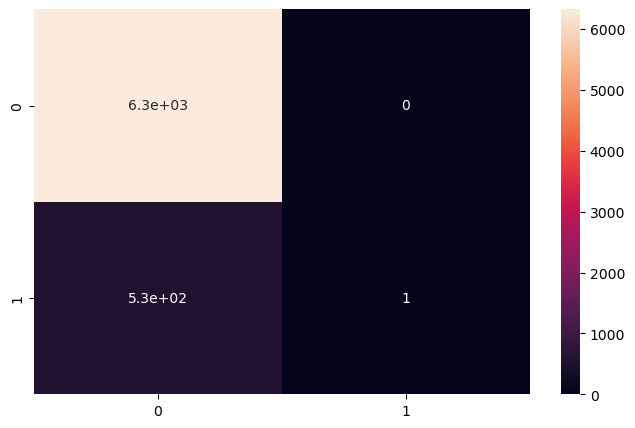

In [105]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)


In [106]:
accuracy = (6325+0)/len(Ytest)
accuracy

0.9221460854351946

In [107]:
print("\nClassification Report:\n", classification_report(Ytest, Ypred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6325
           1       1.00      0.00      0.00       534

    accuracy                           0.92      6859
   macro avg       0.96      0.50      0.48      6859
weighted avg       0.93      0.92      0.89      6859



## Using the predictive model to predict whether the new bookings be cancelled or not on the basis of this predictive model

In [108]:
New_booking = Xtest[0]
prediction = log_reg.predict([New_booking])

In [109]:
prediction

array([0], dtype=int64)

In [110]:
if prediction[0] == 1:
    print("Prediction: This booking is predicted to be cancelled due to car unavailability.")
else:
    print("Prediction: This booking is predicted not to be cancelled.")

Prediction: This booking is predicted not to be cancelled.


# Working for "Cab_Data_3" Dataset 

In [111]:
Cab_data_3

,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
8,3,448.0,0.0,0.0,0.0,01-01-2013 16:00,0,0,01-01-2013 09:44,8668.077225,0
20,3,471.0,0.0,0.0,0.0,01-01-2013 14:30,0,0,01-01-2013 12:52,8668.520590,0
23,3,1286.0,0.0,0.0,0.0,01-01-2013 16:30,0,0,01-01-2013 14:39,8666.658983,0
34,3,1323.0,0.0,0.0,0.0,01-01-2013 20:00,1,0,01-01-2013 17:25,8669.655202,0
47,3,142.0,0.0,0.0,0.0,01-02-2013 03:00,0,0,01-01-2013 19:37,8665.127374,0
...,...,...,...,...,...,...,...,...,...,...,...
43415,3,768.0,0.0,15.0,0.0,11/24/2013 16:00,0,1,11/24/2013 12:32,8659.499027,0
43417,3,1390.0,0.0,15.0,0.0,11/24/2013 15:00,0,0,11/24/2013 13:06,8668.907484,0
43420,3,1237.0,0.0,15.0,0.0,11/25/2013 1:00,1,0,11/24/2013 13:54,8665.508122,0
43424,3,515.0,0.0,15.0,0.0,11/24/2013 15:15,0,0,11/24/2013 14:23,8672.439060,0


## Dropping the columns "to_area_id", "from_city_id"	& "to_city_id" from the table "Cab_data_3"

In [112]:
columns_to_Drop = ['to_area_id','from_city_id','to_city_id']
Cab_data_3 = Cab_data_3.drop(columns = columns_to_Drop, axis = 1)

In [113]:
Cab_data_3

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
8,3,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,8668.077225,0
20,3,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,8668.520590,0
23,3,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,8666.658983,0
34,3,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,8669.655202,0
47,3,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,8665.127374,0
...,...,...,...,...,...,...,...,...
43415,3,768.0,11/24/2013 16:00,0,1,11/24/2013 12:32,8659.499027,0
43417,3,1390.0,11/24/2013 15:00,0,0,11/24/2013 13:06,8668.907484,0
43420,3,1237.0,11/25/2013 1:00,1,0,11/24/2013 13:54,8665.508122,0
43424,3,515.0,11/24/2013 15:15,0,0,11/24/2013 14:23,8672.439060,0


## Applying "unix timestamp" feature to convert the date-time format in float variable

In [114]:
Cab_data_3['from_date'] = pd.to_datetime(Cab_data_3['from_date'], 
                                       format='%m/%d/%Y %H:%M', 
                                       errors='coerce').combine_first(
                                           pd.to_datetime(Cab_data_3['from_date'], 
                                                          format='%m-%d-%Y %H:%M', 
                                                          errors='coerce'))

In [115]:
Cab_data_3['booking_created'] = pd.to_datetime(Cab_data_3['booking_created'], 
                                       format='%m/%d/%Y %H:%M', 
                                       errors='coerce').combine_first(
                                           pd.to_datetime(Cab_data_3['booking_created'], 
                                                          format='%m-%d-%Y %H:%M', 
                                                          errors='coerce'))

In [116]:
Cab_data_3

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation
8,3,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,8668.077225,0
20,3,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,8668.520590,0
23,3,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,8666.658983,0
34,3,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,8669.655202,0
47,3,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,8665.127374,0
...,...,...,...,...,...,...,...,...
43415,3,768.0,2013-11-24 16:00:00,0,1,2013-11-24 12:32:00,8659.499027,0
43417,3,1390.0,2013-11-24 15:00:00,0,0,2013-11-24 13:06:00,8668.907484,0
43420,3,1237.0,2013-11-25 01:00:00,1,0,2013-11-24 13:54:00,8665.508122,0
43424,3,515.0,2013-11-24 15:15:00,0,0,2013-11-24 14:23:00,8672.439060,0


In [117]:
Cab_data_3['from_date(unix_timestamp)'] = Cab_data_3['from_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [118]:
Cab_data_3['booking_created(unix_timestamp)'] = Cab_data_3['from_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [119]:
Cab_data_3

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,distance,Car_Cancellation,from_date(unix_timestamp),booking_created(unix_timestamp)
8,3,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,8668.077225,0,1.357056e+09,1.357056e+09
20,3,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,8668.520590,0,1.357051e+09,1.357051e+09
23,3,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,8666.658983,0,1.357058e+09,1.357058e+09
34,3,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,8669.655202,0,1.357070e+09,1.357070e+09
47,3,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,8665.127374,0,1.357096e+09,1.357096e+09
...,...,...,...,...,...,...,...,...,...,...
43415,3,768.0,2013-11-24 16:00:00,0,1,2013-11-24 12:32:00,8659.499027,0,1.385309e+09,1.385309e+09
43417,3,1390.0,2013-11-24 15:00:00,0,0,2013-11-24 13:06:00,8668.907484,0,1.385305e+09,1.385305e+09
43420,3,1237.0,2013-11-25 01:00:00,1,0,2013-11-24 13:54:00,8665.508122,0,1.385341e+09,1.385341e+09
43424,3,515.0,2013-11-24 15:15:00,0,0,2013-11-24 14:23:00,8672.439060,0,1.385306e+09,1.385306e+09


In [120]:
columns_to_drop = ['from_date','booking_created']
Cab_data_3 = Cab_data_3.drop(columns_to_drop, axis = 1)

In [121]:
Cab_data_3

,travel_type_id,from_area_id,online_booking,mobile_site_booking,distance,Car_Cancellation,from_date(unix_timestamp),booking_created(unix_timestamp)
8,3,448.0,0,0,8668.077225,0,1.357056e+09,1.357056e+09
20,3,471.0,0,0,8668.520590,0,1.357051e+09,1.357051e+09
23,3,1286.0,0,0,8666.658983,0,1.357058e+09,1.357058e+09
34,3,1323.0,1,0,8669.655202,0,1.357070e+09,1.357070e+09
47,3,142.0,0,0,8665.127374,0,1.357096e+09,1.357096e+09
...,...,...,...,...,...,...,...,...
43415,3,768.0,0,1,8659.499027,0,1.385309e+09,1.385309e+09
43417,3,1390.0,0,0,8668.907484,0,1.385305e+09,1.385305e+09
43420,3,1237.0,1,0,8665.508122,0,1.385341e+09,1.385341e+09
43424,3,515.0,0,0,8672.439060,0,1.385306e+09,1.385306e+09


In [122]:
column_c = Cab_data_3.pop('from_date(unix_timestamp)')


Cab_data_3.insert(2, 'from_date(unix_timestamp)', column_c)

In [123]:
column_c = Cab_data_3.pop('booking_created(unix_timestamp)')


Cab_data_3.insert(5, 'booking_created(unix_timestamp)', column_c)

In [124]:
Cab_data_3

,travel_type_id,from_area_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance,Car_Cancellation
8,3,448.0,1.357056e+09,0,0,1.357056e+09,8668.077225,0
20,3,471.0,1.357051e+09,0,0,1.357051e+09,8668.520590,0
23,3,1286.0,1.357058e+09,0,0,1.357058e+09,8666.658983,0
34,3,1323.0,1.357070e+09,1,0,1.357070e+09,8669.655202,0
47,3,142.0,1.357096e+09,0,0,1.357096e+09,8665.127374,0
...,...,...,...,...,...,...,...,...
43415,3,768.0,1.385309e+09,0,1,1.385309e+09,8659.499027,0
43417,3,1390.0,1.385305e+09,0,0,1.385305e+09,8668.907484,0
43420,3,1237.0,1.385341e+09,1,0,1.385341e+09,8665.508122,0
43424,3,515.0,1.385306e+09,0,0,1.385306e+09,8672.439060,0


## Extracting the feature variables "X" and target variables "Y" from "Cab_data_3" Data set

In [125]:
X = Cab_data_3.iloc[:,0:7]

In [126]:
Y = Cab_data_3.iloc[:,7:8]

In [127]:
X

,travel_type_id,from_area_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance
8,3,448.0,1.357056e+09,0,0,1.357056e+09,8668.077225
20,3,471.0,1.357051e+09,0,0,1.357051e+09,8668.520590
23,3,1286.0,1.357058e+09,0,0,1.357058e+09,8666.658983
34,3,1323.0,1.357070e+09,1,0,1.357070e+09,8669.655202
47,3,142.0,1.357096e+09,0,0,1.357096e+09,8665.127374
...,...,...,...,...,...,...,...
43415,3,768.0,1.385309e+09,0,1,1.385309e+09,8659.499027
43417,3,1390.0,1.385305e+09,0,0,1.385305e+09,8668.907484
43420,3,1237.0,1.385341e+09,1,0,1.385341e+09,8665.508122
43424,3,515.0,1.385306e+09,0,0,1.385306e+09,8672.439060


In [128]:
Y 

,Car_Cancellation
8,0
20,0
23,0
34,0
47,0
...,...
43415,0
43417,0
43420,0
43424,0


## Splitting the X and Y into training and testing data for "Cab_data_3" dataset in the ratio of 80:20

In [129]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [130]:
Xtrain

,travel_type_id,from_area_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance
22037,3,363.0,1.373450e+09,0,0,1.373450e+09,8677.186693
15218,3,516.0,1.369538e+09,1,0,1.369538e+09,8670.911461
24475,3,1086.0,1.374779e+09,0,0,1.374779e+09,8669.218556
16160,3,1082.0,1.370099e+09,1,0,1.370099e+09,8661.288401
15620,3,182.0,1.369840e+09,1,0,1.369840e+09,8669.642085
...,...,...,...,...,...,...,...
30846,3,393.0,1.377946e+09,1,0,1.377946e+09,8677.266054
31064,3,1061.0,1.378028e+09,1,0,1.378028e+09,8660.541306
32038,3,433.0,1.378481e+09,0,0,1.378481e+09,8663.879469
5387,3,1166.0,1.362196e+09,0,0,1.362196e+09,8672.112602


In [131]:
Xtest

,travel_type_id,from_area_id,from_date(unix_timestamp),online_booking,mobile_site_booking,booking_created(unix_timestamp),distance
24275,3,1096.0,1.374722e+09,1,0,1.374722e+09,8677.328585
2457,3,1159.0,1.359279e+09,0,0,1.359279e+09,8662.118593
40657,3,542.0,1.383295e+09,1,0,1.383295e+09,8666.744685
16412,3,515.0,1.370196e+09,0,0,1.370196e+09,8672.439060
212,3,571.0,1.357305e+09,0,0,1.357305e+09,8674.777636
...,...,...,...,...,...,...,...
15392,3,1026.0,1.369678e+09,0,0,1.369678e+09,8662.621168
34811,3,296.0,1.380121e+09,1,0,1.380121e+09,8664.279568
38203,3,601.0,1.382022e+09,1,0,1.382022e+09,8661.052951
12678,3,142.0,1.368009e+09,0,0,1.368009e+09,8665.127374


In [132]:
Ytrain

,Car_Cancellation
22037,0
15218,0
24475,0
16160,0
15620,0
...,...
30846,0
31064,0
32038,0
5387,0


In [133]:
Ytest

,Car_Cancellation
24275,0
2457,0
40657,0
16412,0
212,0
...,...
15392,0
34811,0
38203,0
12678,0


In [134]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [135]:
Xtrain

array([[ 0.        , -0.8631773 ,  0.08725551, ..., -0.16495722,
         0.08725551,  1.4379061 ],
       [ 0.        , -0.50210389, -0.42229376, ..., -0.16495722,
        -0.42229376,  0.42725193],
       [ 0.        ,  0.84307156,  0.26027017, ..., -0.16495722,
         0.26027017,  0.15460191],
       ...,
       [ 0.        , -0.69798032,  0.74250751, ..., -0.16495722,
         0.74250751, -0.70528191],
       [ 0.        ,  1.03186812, -1.37856314, ..., -0.16495722,
        -1.37856314,  0.62070104],
       [ 0.        ,  0.11148491,  1.49716089, ..., -0.16495722,
         1.49716089,  0.78362726]])

In [136]:
Xtest

array([[ 0.        ,  0.86667113,  0.2528854 , ..., -0.16495722,
         0.2528854 ,  1.4607584 ],
       [ 0.        ,  1.01534842, -1.75846864, ..., -0.16495722,
        -1.75846864, -0.98887884],
       [ 0.        , -0.44074501,  1.36939261, ..., -0.16495722,
         1.36939261, -0.24382595],
       ...,
       [ 0.        , -0.30150755,  1.2036455 , ..., -0.16495722,
         1.2036455 , -1.16050519],
       [ 0.        , -1.38472779, -0.62144817, ..., -0.16495722,
        -0.62144817, -0.50430126],
       [ 0.        , -1.01893446,  0.9352149 , ..., -0.16495722,
         0.9352149 , -0.33087632]])

## Applying Logistic Regression to classify on the basis of Predictive Problem

In [137]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(Xtrain,Ytrain)

LogisticRegression(random_state=42)

In [138]:
Ypred = log_reg.predict(Xtest)

In [139]:
Ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluate models using appropriate metrics such as accuracy, precision, recall and F1-score.

In [140]:
conf_matrix = confusion_matrix(Ytest,Ypred)

In [141]:
conf_matrix

array([[1433,    0],
       [  77,    0]], dtype=int64)

<Axes: >

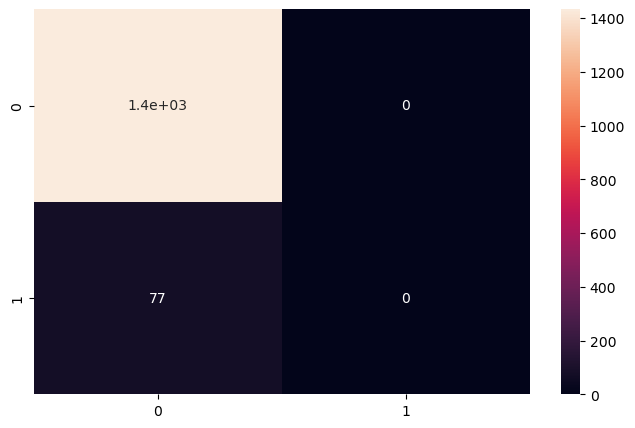

In [142]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)


In [143]:
accuracy = (1433+0)/len(Ytest)
accuracy

0.9490066225165563

In [144]:
print("\nClassification Report:\n", classification_report(Ytest, Ypred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1433
           1       0.00      0.00      0.00        77

    accuracy                           0.95      1510
   macro avg       0.47      0.50      0.49      1510
weighted avg       0.90      0.95      0.92      1510



## Using the predictive model to predict whether the new bookings be cancelled or not on the basis of this predictive model

In [145]:
New_booking = Xtest[0]
prediction = log_reg.predict([New_booking])

In [146]:
prediction

array([0], dtype=int64)

In [147]:
if prediction[0] == 1:
    print("Prediction: This booking is predicted to be cancelled due to car unavailability.")
else:
    print("Prediction: This booking is predicted not to be cancelled.")

Prediction: This booking is predicted not to be cancelled.


In [148]:
New_booking_1 = Xtest[0]
prediction = log_reg.predict([New_booking_1])

In [149]:
prediction

array([0], dtype=int64)

In [150]:
if prediction[0] == 1 :
    print("Prediction : This booking is predicted to be cancelled due to the car unavailability")
else :
    print("Prediction : This booking is predicted not to be cancelled")
    

Prediction : This booking is predicted not to be cancelled
